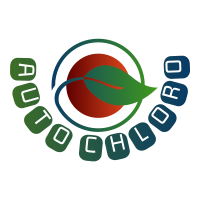

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [3]:

# For checking out that how many images are available in the train set we can use import OS
for types in os.listdir("PlantVillage/My Drive/train_set/"):
    print(str(len(os.listdir("PlantVillage/My Drive/train_set/"+ types)))+" "+ types+' images')

917 Pepper__bell___Bacterial_spot images
1402 Pepper__bell___healthy images
927 Potato___Early_blight images
127 Potato___healthy images
919 Potato___Late_blight images
2017 Tomato_Bacterial_spot images
919 Tomato_Early_blight images
1494 Tomato_healthy images
1816 Tomato_Late_blight images
879 Tomato_Leaf_Mold images
1682 Tomato_Septoria_leaf_spot images
1603 Tomato_Spider_mites_Two_spotted_spider_mite images
1307 Tomato__Target_Spot images
308 Tomato__Tomato_mosaic_virus images
3068 Tomato__Tomato_YellowLeaf__Curl_Virus images


In [4]:

# Complete Dataset images can be loaded using ImageDataGenerator function
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("PlantVillage/My Drive/train_set",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory("PlantVillage/My Drive/test_data",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

Found 19384 images belonging to 15 classes.
Found 1254 images belonging to 15 classes.


In [5]:
detection=Sequential()

#1 -convolutional layer-1
detection.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#2 -convolutional layer-2
detection.add(Conv2D(128,(5,5),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#3 -convolutional layer-3
detection.add(Conv2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#4 -convolutional layer-4
detection.add(Conv2D(1024,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

detection.add(Flatten())
detection.add(Dense(256))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(15,activation='softmax'))
optimum=Adam(lr=0.005)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
detection.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [7]:
ephocs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
detection.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)
detection.save('auto_chloro_model.h5')

Epoch 1/15
302/302 [==============================] - 1382s 5s/step - loss: 0.9326 - acc: 0.6925 - val_loss: 7.4230 - val_acc: 0.2804
Epoch 2/15
302/302 [==============================] - 1150s 4s/step - loss: 0.5053 - acc: 0.8310 - val_loss: 7.5591 - val_acc: 0.1933
Epoch 3/15
302/302 [==============================] - 1058s 4s/step - loss: 0.3928 - acc: 0.8667 - val_loss: 3.3730 - val_acc: 0.4317
Epoch 4/15
302/302 [==============================] - 1250s 4s/step - loss: 0.3095 - acc: 0.8952 - val_loss: 0.4983 - val_acc: 0.8306
Epoch 5/15
302/302 [==============================] - 1235s 4s/step - loss: 0.2486 - acc: 0.9170 - val_loss: 0.8202 - val_acc: 0.7574
Epoch 6/15
302/302 [==============================] - 1018s 3s/step - loss: 0.2299 - acc: 0.9227 - val_loss: 1.6029 - val_acc: 0.6028
Epoch 7/15
302/302 [==============================] - 1227s 4s/step - loss: 0.1999 - acc: 0.9313 - val_loss: 0.7951 - val_acc: 0.7788
Epoch 8/15
302/302 [==============================] - 1271s 4s

'Tomato_Bacterial_spot'

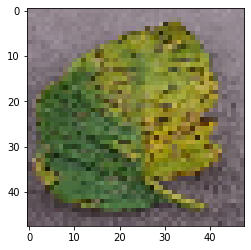

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

test_img=image.load_img("tbs.JPG",target_size=(48,48))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=detection.predict(test_img)
a=result.argmax()
classes=train_generator.class_indices
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
           if(i==a):
                output=category[i]
output  